# California Housing Prices - Regressione

In questo notebook utilizzeremo una versione ridotta e leggermente modificata del dataset `California Housing Prices`. Il dataset contiene le caratteristiche delle case presenti in un determinato distretto della California e alcune statistiche riassuntive basate sul censimento statunitense del 1990. Ogni riga contiene le informazioni per uno specifico isolato residenziale (*block group*). 

Utilizzeremo questo dataset per sviluppare un modello di **regressione**, che ci permetterà di stimare il **prezzo mediano delle case** (*medianHouseValue*) in un certo isolato in base alle altre variabili socio-economiche e geografiche disponibili nel dataset. 

Dopo una prima parte di pre-processing dei dati, vedremo come implementare un modello di regressione lineare e faremo un confronto con altri modelli di regressione.

<a id="0"></a> <br>

# Indice
1. [Pre-processing dei dati](#1)
2. [Exploratory Data Analysis](#2)
3. [Implementazione e valutazione del modello di Regressione Lineare](#3)
4. [Altri modelli di regressione](#4)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

<a id="1"></a> <br>
## 1. Pre-processing dei dati

Lo step fondamentale prima di applicare un modello di Machine Learning è quello di studiare le caratteristiche principali dei dati per renderli utilizzabili dal modello che sceglieremo. In questa sezione, metteremo in pratica le tecniche viste nelle precedenti lezioni per analizzare il dataset, in particolare dovremo:
- caricare il dataset
- estrarre le prime descrizioni generali (dimensione, tipo di dati, variabili, ...)
- gestire i valori mancanti
- gestire variabili categoriche

- Caricamento del dataset e descrizione generale

In [ ]:
# Caricamento del dataset
df = pd.read_csv('../data/housing_modified.csv')

# Stampa le prime dieci righe
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0,NEAR OCEAN
1,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
2,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,NEAR OCEAN
3,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,NEAR OCEAN
4,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,NEAR OCEAN
5,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0,NEAR OCEAN
6,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0,NEAR OCEAN
7,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0,NEAR OCEAN
8,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
9,-124.22,41.73,28.0,3003.0,699.0,1530.0,653.0,1.7038,78300.0,NEAR OCEAN


In [3]:
# Che dimensione ha il dataset? Quante righe e quante colonne ha?
df.shape

(11010, 10)

In [4]:
# Quali sono i nomi delle variabili presenti nel dataset?
df.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

Il dataset contiene 10 variabili:

1. **longitude** (longitudine): Coordinata geografica che indica la longitudine della posizione dell’isolato (valori più alti indicano una posizione più occidentale)

2. **latitude** (latitudine): Coordinata geografica che indica la latitudine della posizione dell’isolato (valori più alti indicano una posizione più settentrionale)

3. **housing_median_age** (età mediana delle abitazioni): Indica l’età mediana degli edifici presenti nell'isolato; valori più bassi indicano edifici più recenti

4. **total_rooms** (numero totale di stanze): Totale delle stanze presenti in tutte le abitazioni dell’isolato

5. **total_bedrooms** (numero totale di camere da letto): Totale delle camere da letto presenti nell’isolato

6. **population** (popolazione): Numero totale di persone che risiedono nell’isolato

7. **households** (unità abitative): Numero totale di famiglie o unità abitative nell’isolato

8. **median_income** (reddito mediano): Indica il reddito mediano delle famiglie in un isolato, espresso in decine di migliaia di dollari (es. un valore di 5 equivale a 50.000$ annui)

9. **median_house_value** (valore mediano delle case): Indica il valore mediano delle abitazioni in un isolato, espresso in dollari. Questa è la variabile target che vogliamo prevedere con la regressione lineare

10. **ocean_proximity** (vicinanza all’oceano): Variabile categorica che descrive la posizione geografica dell’isolato rispetto alla costa. Può assumere i seguenti valori: "NEAR OCEAN" (vicino all’oceano), "INLAND" (nell’entroterra), "NEAR BAY" (vicino a una baia), "<1H OCEAN" (a meno di un’ora dall’oceano), "ISLAND" (situato su un’isola)

In [5]:
# Alcune informazioni importanti sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11010 entries, 0 to 11009
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           11010 non-null  float64
 1   latitude            11010 non-null  float64
 2   housing_median_age  11010 non-null  float64
 3   total_rooms         11010 non-null  float64
 4   total_bedrooms      11007 non-null  float64
 5   population          11010 non-null  float64
 6   households          11010 non-null  float64
 7   median_income       11010 non-null  float64
 8   median_house_value  11010 non-null  float64
 9   ocean_proximity     11010 non-null  object 
dtypes: float64(9), object(1)
memory usage: 860.3+ KB


In [6]:
# Tipo di dato in ogni colonna
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Caratteristiche statistiche principali per le variabili numeriche
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,11010.000000,11010.000000,11010.000000,11010.000000,11007.000000,11010.000000,11010.000000,11010.000000,11010.000000
mean,-119.673575,35.983460,24.767656,2923.948765,578.908843,1542.638254,530.719437,3.665050,172243.691425
std,2.051269,2.253805,11.298661,2530.013552,468.334682,1298.664655,423.246878,1.453009,82231.679357
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,-121.640000,33.980000,16.000000,1597.142857,325.000000,854.083333,301.000000,2.572900,104200.000000
50%,-119.400000,35.630000,24.000000,2301.250000,464.500000,1257.000000,432.000000,3.484833,160200.000000
75%,-117.920000,37.940000,33.000000,3400.000000,680.000000,1823.000000,628.000000,4.541925,228600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,376200.000000


- Valori mancanti

In [8]:
# Quanti valori nulli ci sono in ogni colonna?
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        3
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# Come gestiamo i valori nulli?
# Ci sono vari metodi per gestire i dati mancanti: possiamo eliminare dal dataset le righe corrispondenti, sostituirli con un valore medio o con il valore mediano, ...
# In questo caso, siccome le righe che contengono i valori mancanti per 'total_bedrooms' sono solo 3 possiamo
# decidere di eliminare direttamente le righe corrispondenti
df.dropna(inplace=True) # Eliminiamo le righe che hanno almeno un valore nullo


In [10]:
# Controlliamo che l'operazione sia andata a buon fine
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# Valutiamo se ci sono duplicati in seguito alla nostra operazione e in caso affermativo li rimuoviamo
df.duplicated().sum()

0

In [12]:
# Alternativa: possiamo provare a sostituirli con il valore dell'isolato più vicino

# from scipy.spatial import cKDTree # ricerca in maniera efficiente il vicino più prossimo

# Identifichiamo le righe con valori mancanti in total_bedrooms
# missing_mask = df["total_bedrooms"].isna()

# Salviamo le coordinate (latitudine, longitudine) per gli isolati con valore noto
# known_coords = df.loc[~missing_mask, ["latitude", "longitude"]].values
# known_values = df.loc[~missing_mask, "total_bedrooms"].values

# Creiamo un KDTree per una ricerca efficiente del vicino più prossimo
# tree = cKDTree(known_coords)

# Troviamo il vicino più prossimo per ogni isolato con valore mancante
# missing_coords = df.loc[missing_mask, ["latitude", "longitude"]].values
# _, nearest_idx = tree.query(missing_coords)

# Riempiamo e i valori mancanti con quelli dell'isolato più vicino
# df.loc[missing_mask, "total_bedrooms"] = known_values[nearest_idx]

- Variabili categoriche

In [13]:
# Analizziamo la colonna ocean_proximity contando il numero di osservazioni per ogni classe
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
INLAND        5173
<1H OCEAN     3872
NEAR OCEAN    1186
NEAR BAY       774
ISLAND           2
Name: count, dtype: int64

In [14]:
# Trasformiamo la variabile categorica 'ocean_proximity' in variabile ordinale
# Ricorda: una variabile ordinale è una variabile che assume valori categorici che però possono essere ordinati 
# (ad esempio una variabile 'Titolo di studio' con tre modalità disposte in ordine crescente: licenza media inferiore, diploma e laurea)
from sklearn.preprocessing import OrdinalEncoder

# Inizializzare l'OrdinalEncoder
encoder = OrdinalEncoder( )

# Selezionare la variabile da trasformare
ocean_proximity_encoded = encoder.fit_transform(df[['ocean_proximity']])

# Convertire la colonna del DataFrame originario con i dati encoded
df['ocean_proximity'] = ocean_proximity_encoded

In [15]:
# Stampare il DataFrame aggiornato
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0,4.0
1,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,4.0
2,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,4.0
3,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,4.0
4,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,4.0


<a id="2"></a> <br>

## 2. Exploratory data analysis (EDA)

In questa sezione utilizzeremo dei metodi di visualizzazione dei dati per continuare ad analizzare le caratteristiche del dataset. 
In particolare dovremo:
- plottare la correlation heatmap per valutare la correlazione tra le diverse variabili
- studiare le distribuzioni delle diverse variabili

- Correlazione

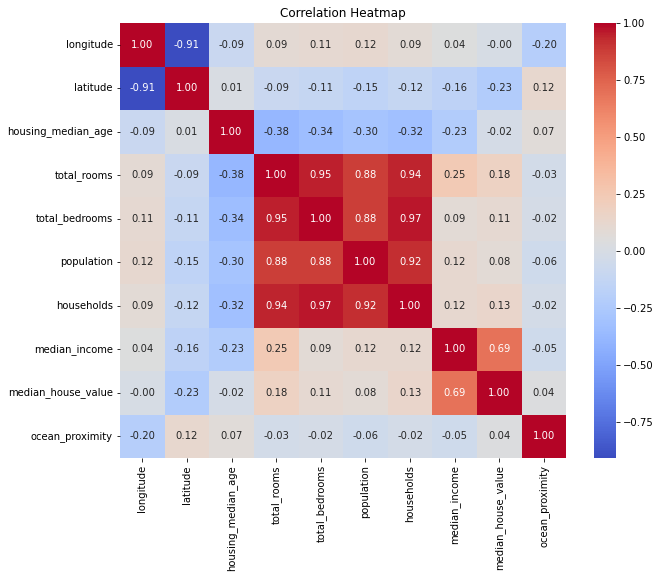

In [16]:
# Stampiamo la correlation heatmap per valutare la correlazione tra le variabili
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Distribuzioni delle variabili

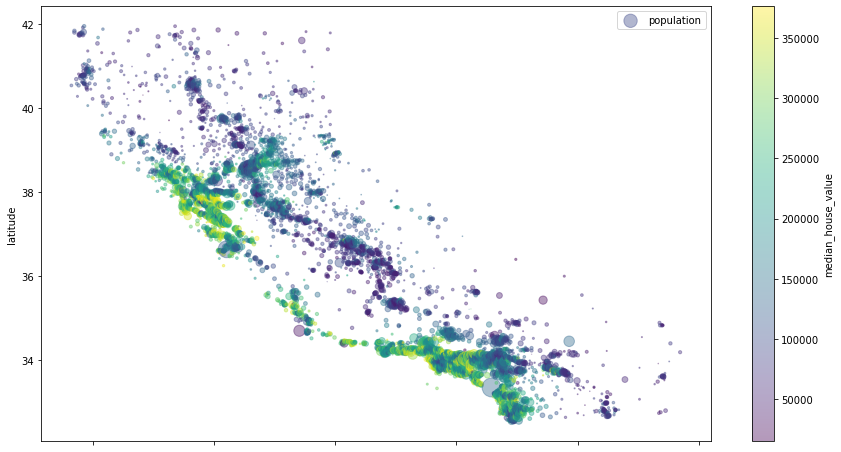

In [17]:
# Plottiamo la distribuzione geografica degli isolati. In quali zone le case hanno un prezzo più alto?
df.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"] / 100, label="population", figsize=(15, 8),
    c="median_house_value",  colorbar=True
)
plt.show()

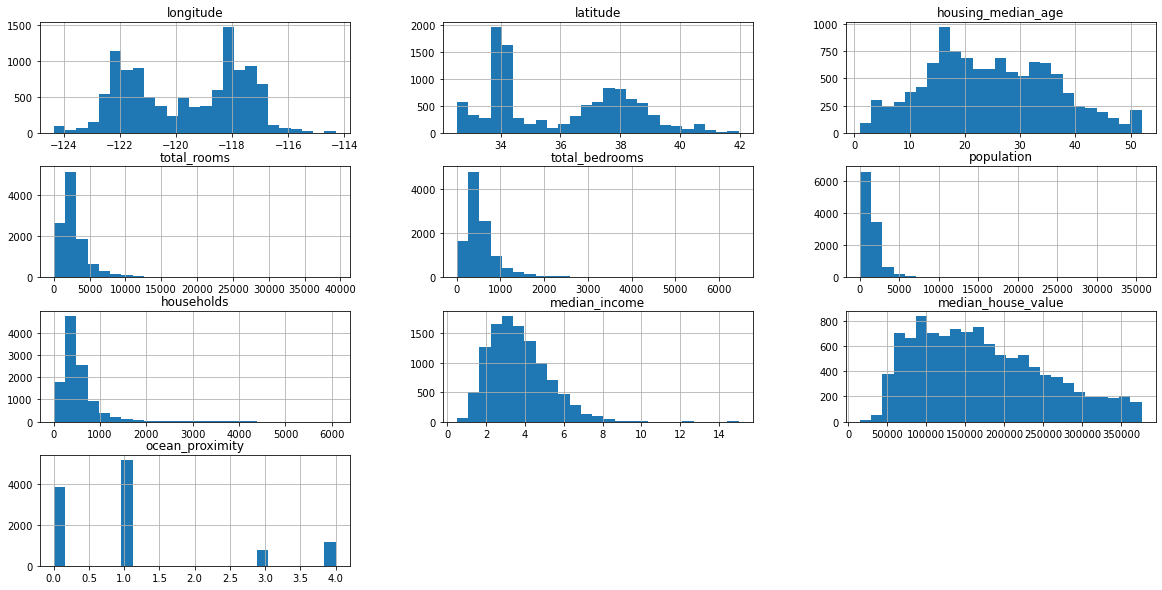

In [18]:
# Studiamo la distribuzione delle variabili presenti nel dataset
df.hist(bins=25,figsize=(20,10))
plt.show()

<a id="3"></a> <br>

## 3. Implementazione e valutazione del modello di Regressione Lineare

In questa sezione costruiremo e alleneremo il modello di regressione lineare (seguendo gli step illustrati nella presentazione). Infine valuteremo il modello ottenuto calcolando diverse metriche.

LinearRegression (documentazione): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [20]:
# Definiamo le variabili di input (X) e di output (y)
X = df.drop(columns=['median_house_value' ])
y= df['median_house_value']

In [21]:
# Dividiamo i dati in training (80%) e test(20%)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.20 , random_state=42)


In [22]:
X_train.shape

(8805, 9)

In [23]:
y_train.shape


(8805,)

In [24]:
X_test.shape

(2202, 9)

In [25]:
y_test.shape

(2202,)

In [26]:
# Standardizziamo i dati
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.fit_transform(X_test)

In [27]:
# Creiamo il modello di Regressione Lineare
model=LinearRegression()

In [28]:
# Alleniamo il modello sui dati di training
model.fit(X_train,y_train)

LinearRegression()

In [29]:
# Facciamo previsioni sui dati di test
y_predict = model.predict(X_test)


In [30]:
# Valutiamo il modello

# calcoliamo le diverse metriche (R2, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolupte Percentage Error (MAPE))
r_squared = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
mape = mean_absolute_percentage_error(y_test, y_predict) # Misura l'errore medio in percentuale rispetto ai valori reali

print('R squared (R2):',r_squared)
print(f'Mean Squared Error (MSE):{mse}')
print(f'Root Mean Squared Error (RMSE):{rmse}')
print(f'Mean Absolute Error (MAE):{mae}')
print("Mean  absolute precentage error of linear regression : ",mape*100,'%')

R squared (R2): 0.6536650321241597
Mean Squared Error (MSE):2451751290.701186
Root Mean Squared Error (RMSE):49515.162230383394
Mean Absolute Error (MAE):37873.20373304386
Mean  absolute precentage error of linear regression :  26.237386067583962 %


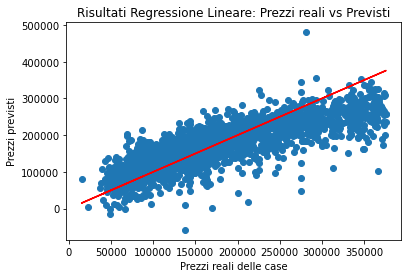

In [31]:
plt.scatter(np.array(y_test), y_predict)
plt.plot(np.array(y_test),np.array(y_test),color='red')
plt.xlabel("Prezzi reali delle case")
plt.ylabel("Prezzi previsti")
plt.title("Risultati Regressione Lineare: Prezzi reali vs Previsti")
plt.show()

<a id="4"></a> <br>

## 4. Altri modelli di regressione

In questa sezione vedremo altri modelli di regressione e confronteremo gli errori con quelli ottenuti con il modello di regressione lineare. I modelli che vedremo saranno:
- Ridge regression
- Lasso regression
- XGBoost Regressor

*Ridge e Lasso Regression*
Ridge Regression e Lasso Regression sono due versioni della regressione lineare che aggiungono una penalizzazione per evitare modelli troppo complessi (overfitting).

*XGBoost Regressor*
XGBoost Regressor è un modello avanzato basato su Gradient Boosting, che crea tanti piccoli alberi decisionali e li migliora passo dopo passo, correggendo gli errori fatti dai precedenti. È veloce e gestisce bene i dati con outlier o valori mancanti.

In [32]:
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor

In [33]:
# Creiamo il modello di Ridge Regression
ridge = Ridge(alpha=100, random_state=42)  # Prova con diversi valori di alpha

# Alleniamo il modello sui dati di training
ridge.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
ridge_pred = ridge.predict(X_test)


In [34]:
# Valutiamo il modello di Ridge Regression
r_squared_ridge = r2_score(y_test , ridge_pred)
mse_ridge = mean_squared_error(y_test, ridge_pred)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test,ridge_pred)
mape_ridge = mean_absolute_percentage_error(y_test , ridge_pred)

print('R squared of linear regression :',r_squared_ridge)
print(f'Mean Squared Error (MSE):{mse_ridge}')
print(f'Root Mean Squared Error (RMSE):{rmse_ridge}')
print(f'Mean Absolute Error (MAE):{mae_ridge}')
print("Mean  absolute precentage error of linear regression : ",mape_ridge*100,'%')

R squared of linear regression : 0.6421745496632795
Mean Squared Error (MSE):2533093943.962644
Root Mean Squared Error (RMSE):50329.85142003346
Mean Absolute Error (MAE):38873.99189276227
Mean  absolute precentage error of linear regression :  26.900631141315078 %


In [35]:
# Creiamo il modello di Lasso Regression
lasso = Lasso(alpha=100, random_state=42)

# Alleniamo il modello sui dati di training
lasso.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
lasso_pred = lasso.predict(X_test)

In [36]:
r_squared_lasso = r2_score(y_test , lasso_pred)
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test,lasso_pred)
mape_lasso = mean_absolute_percentage_error(y_test , lasso_pred)

print('R squared of linear regression :',r_squared_lasso)
print(f'Mean Squared Error (MSE):{mse}')
print(f'Root Mean Squared Error (RMSE):{rmse}')
print(f'Mean Absolute Error (MAE):{mae}')
print("Mean  absolute precentage error of linear regression : ",mape_lasso*100,'%')

R squared of linear regression : 0.6531926440657011
Mean Squared Error (MSE):2451751290.701186
Root Mean Squared Error (RMSE):49515.162230383394
Mean Absolute Error (MAE):37873.20373304386
Mean  absolute precentage error of linear regression :  26.28317385809299 %


In [37]:
# Creiamo il modello di XGBoost Regressor
xgb = XGBRegressor(n_estimators=80, learning_rate=0.1, random_state=42)

# Alleniamo il modello sui dati di training
xgb.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
xgb_pred = xgb.predict(X_test)

In [38]:
r_squared_xgb = r2_score(y_test , xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test,xgb_pred)
mape_xgb = mean_absolute_percentage_error(y_test , xgb_pred)

print('R squared (R2) :',r_squared_xgb)
print(f'Mean Squared Error (MSE):{mse_xgb}')
print(f'Root Mean Squared Error (RMSE):{rmse_xgb}')
print(f'Mean Absolute Error (MAE):{mae_xgb}')
print("Mean  absolute precentage error of linear regression : ",mape_xgb*100,'%')

R squared (R2) : 0.6531926440657011
Mean Squared Error (MSE):1854025377.254896
Root Mean Squared Error (RMSE):43058.39496840187
Mean Absolute Error (MAE):30557.66802409332
Mean  absolute precentage error of linear regression :  19.089793485899513 %


Qual è il modello migliore?

In [39]:
# Confrontiamo gli errori ottenuti con i diversi modelli

# Creiamo un dizionario con gli errori ottenuti dai diversi modelli
data = {
    "Metrica": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "XGBoost Regressor"
    ],
    "R² (⬆️ meglio)": [r_squared, r_squared_ridge, r_squared_lasso, r_squared_xgb],
    "RMSE (⬇️ meglio)": [rmse, rmse_ridge, rmse_lasso, rmse_xgb],
    "MAE (⬇️ meglio)": [mae, mae_ridge, mae_lasso, mae_xgb],
    "MAPE (⬇️ meglio)": [f"{mape*100}%", f"{mape_ridge*100}%", f"{mape_lasso*100}%", f"{mape_xgb*100}%"]
}

# Creiamo il DataFrame
df = pd.DataFrame(data).round(2)

# Stampiamo la tabella con un formato leggibile
print(df.to_string(index=False))


          Metrica  R² (⬆️ meglio)  RMSE (⬇️ meglio)  MAE (⬇️ meglio)    MAPE (⬇️ meglio)
Linear Regression            0.65          49515.16         37873.20 26.237386067583962%
 Ridge Regression            0.64          50329.85         38873.99 26.900631141315078%
 Lasso Regression            0.65          49548.92         37951.84  26.28317385809299%
XGBoost Regressor            0.74          43058.39         30557.67 19.089793485899513%


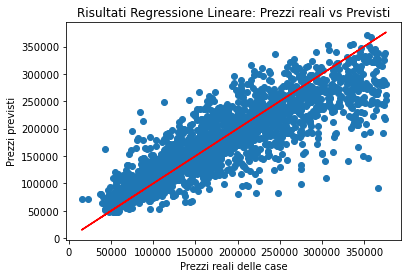

In [40]:
plt.scatter(np.array(y_test), xgb_pred)
plt.plot(np.array(y_test),np.array(y_test),color='red')
plt.xlabel("Prezzi reali delle case")
plt.ylabel("Prezzi previsti")
plt.title("Risultati Regressione Lineare: Prezzi reali vs Previsti")
plt.show()

**Acknowledgements**

This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.
and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.

Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)